In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

df=pd.read_csv('semana1.csv')

In [ ]:
df = df.drop(df.columns[[0, 2,5]], axis=1)
df.rename(columns={'_NAME': 'NAME','_VALUE':'VALOR','_TIMESTAMP':'TIME'},inplace=True)
df=df[~df.NAME.str.contains("BATERIA")]
df=df[~df.NAME.str.contains("TEMPERATURA")]

df['TIME'] = pd.to_datetime(df['TIME'])
df['FECHA'] = [d.date() for d in df['TIME']]
df['HORA'] = df['TIME'].dt.hour
df=df.pivot_table('VALOR', ['FECHA', 'HORA'], 'NAME')
df.rename(columns={'Channel1.Device1.Global.ALIMENTADORES_PRESION': 'ALIMENTADORES','Channel1.Device1.Global.ENFRIA_ESTE_PRESION':'ENFRIAMIENTO ESTE','Channel1.Device1.Global.ENFRIA_OESTE_PRESION':'ENFRIAMIENTO OESTE','Channel1.Device1.Global.REFINADOR_PRESION':'REFINADOR'},inplace=True)
df=df[9:-3]
df

NAME             ALIMENTADORES  ...  REFINADOR
FECHA      HORA                 ...           
2020-05-30 0         38.618661  ...  46.643287
           1         38.624896  ...  46.715570
           2         38.633781  ...  46.699971
           3         38.670876  ...  46.764414
           4         38.698134  ...  46.771944
...                        ...  ...        ...
2020-06-05 7         38.166518  ...  47.260390
           8         38.064208  ...  47.068682
           9         37.977363  ...  46.974239
           10        37.675679  ...  46.746694
           11        37.596117  ...  46.541470

[156 rows x 4 columns]

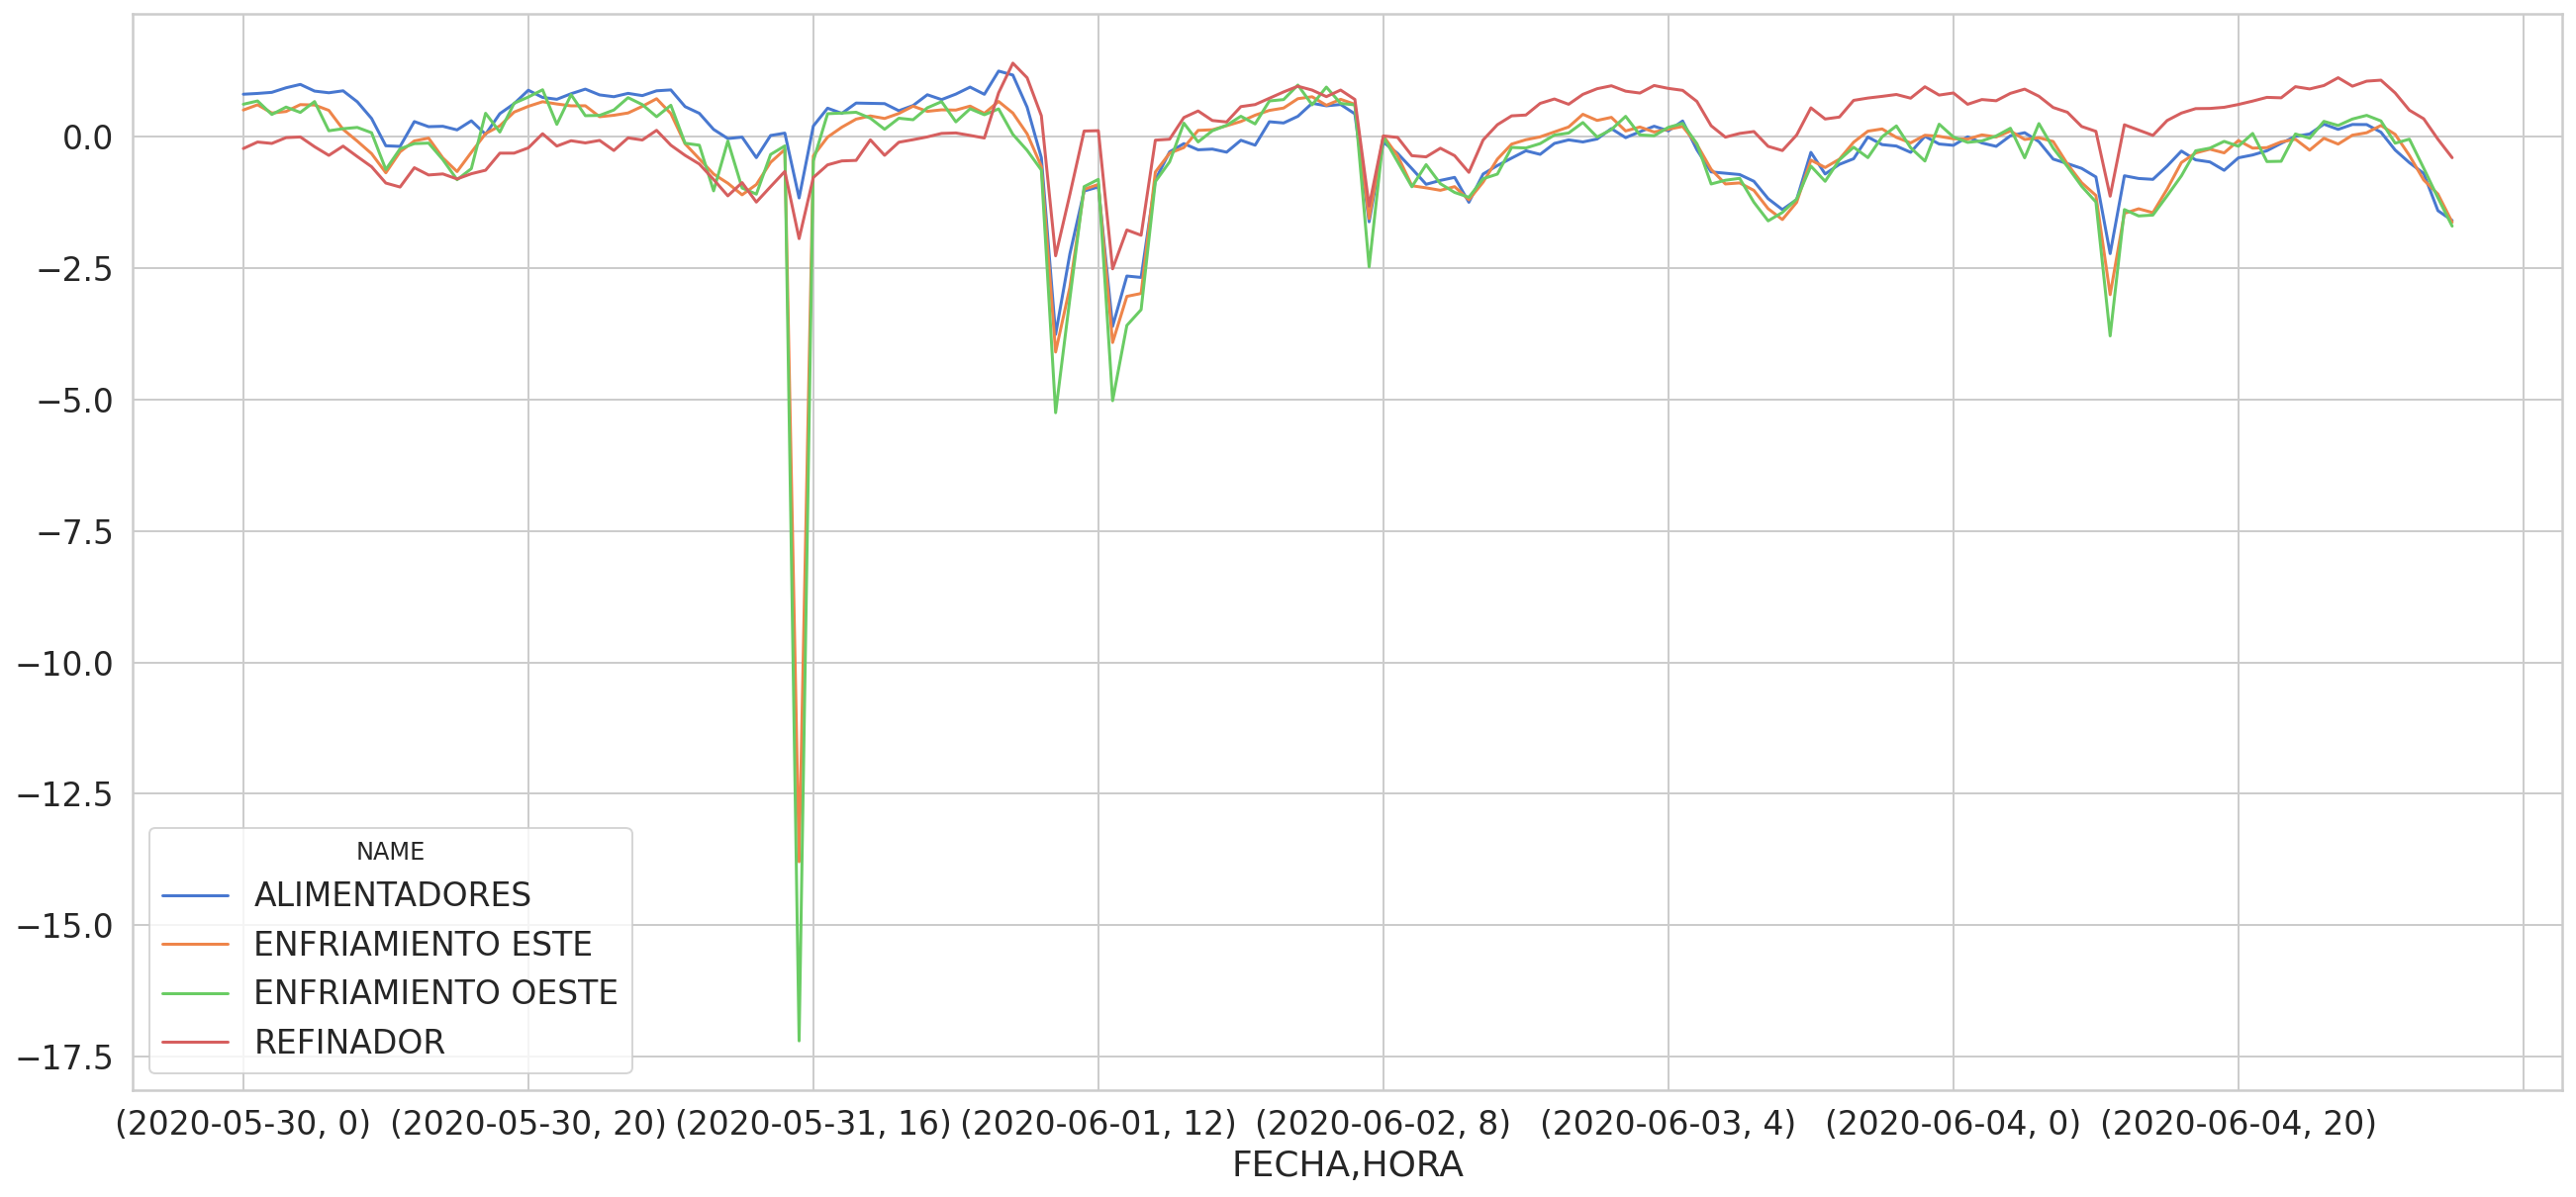

In [ ]:
df.plot()

In [ ]:
test_size = 24
train_size = (len(df)-test_size)
train, test = df.iloc[0:train_size],df.iloc[train_size:len(df)]
print(len(train),len(test))

132 24


In [ ]:
datos=df.ALIMENTADORES
faltantes=np.array(datos)
print(faltantes)
largo=len(faltantes)
print(largo)

[38.61866118 38.62489605 38.63378143 38.67087555 38.69813442 38.64399376
 38.6303894  38.64637928 38.55705891 38.42214635 38.20093333 38.19606915
 38.39711177 38.35582555 38.35896372 38.32980874 38.4033219  38.29410521
 38.46120173 38.54182358 38.65104205 38.59277732 38.57758325 38.6226378
 38.65992133 38.61306858 38.59839153 38.62559064 38.60732708 38.6463143
 38.65352465 38.51812731 38.46377799 38.33362261 38.25956853 38.27115879
 38.104997   38.28434264 38.30361576 37.77844187 38.36127796 38.50560793
 38.46343613 38.54695193 38.54502233 38.542383   38.48487275 38.52724787
 38.61432508 38.57518965 38.61969611 38.67629022 38.61786474 38.80614541
 38.77382113 38.51372732 38.10464973 36.67315191 37.32500808 37.83473606
 37.86756528 36.73839821 37.14615976 37.13489887 37.92487965 38.15178731
 38.21844641 38.16848882 38.17424323 38.14934902 38.24576258 38.20581207
 38.39574254 38.38580914 38.43974272 38.54549751 38.52456264 38.5355299
 38.45966458 37.58524597 38.22998603 38.13930384 38.01

In [ ]:
from sklearn.preprocessing import RobustScaler

f_columns = ['REFINADOR','ENFRIAMIENTO ESTE', 'ENFRIAMIENTO OESTE']

f_transformer = RobustScaler()
t_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
t_transformer = t_transformer.fit(train[['ALIMENTADORES']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['ALIMENTADORES'] = t_transformer.transform(train[['ALIMENTADORES']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['ALIMENTADORES'] = t_transformer.transform(test[['ALIMENTADORES']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
print(train)

NAME             ALIMENTADORES  ...  REFINADOR
FECHA      HORA                 ...           
2020-05-30 0          0.812775  ...  -0.221205
           1          0.827427  ...  -0.097256
           2          0.848308  ...  -0.124005
           3          0.935481  ...  -0.013500
           4          0.999541  ...  -0.000589
...                        ...  ...        ...
2020-06-04 7         -0.421853  ...   0.560294
           8         -0.507687  ...   0.469284
           9         -0.598844  ...   0.198729
           10        -0.761682  ...   0.106055
           11        -2.220866  ...  -1.127946

[132 rows x 4 columns]


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i])
        print(ys)
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 6

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.ALIMENTADORES, time_steps)
X_test, y_test = create_dataset(test, test.ALIMENTADORES, time_steps)

print(X_train.shape, y_train.shape)

[0.8127749318344833]
[0.8127749318344833, 0.8274271977240079]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.9995411941017155]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.9995411941017155, 0.8723078115979321]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.9995411941017155, 0.8723078115979321, 0.8403368680445373]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.9995411941017155, 0.8723078115979321, 0.8403368680445373, 0.8779139102298784]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.9995411941017155, 0.8723078115979321, 0.8403368680445373, 0.8779139102298784, 0.6680063732547986]
[0.8127749318344833, 0.8274271977240079, 0.8483083126811815, 0.935481420696017, 0.999541194101715

In [ ]:
print(test)

NAME             ALIMENTADORES  ...  REFINADOR
FECHA      HORA                 ...           
2020-06-04 12        -0.739191  ...   0.231010
           13        -0.790926  ...   0.130137
           14        -0.807645  ...   0.029090
           15        -0.554100  ...   0.312660
           16        -0.268995  ...   0.453856
           17        -0.436674  ...   0.538609
           18        -0.476428  ...   0.541645
           19        -0.635519  ...   0.563688
           20        -0.397377  ...   0.617540
           21        -0.343346  ...   0.682044
           22        -0.263251  ...   0.752842
           23        -0.121563  ...   0.743947
2020-06-05 0          0.010869  ...   0.956235
           1          0.055853  ...   0.913047
           2          0.242818  ...   0.978154
           3          0.143436  ...   1.126702
           4          0.236882  ...   0.965595
           5          0.235221  ...   1.061292
           6          0.090225  ...   1.080247
           7 

In [ ]:
print(X_test)

[[[-0.73919072 -1.45491022 -1.38273802  0.23101028]
  [-0.79092622 -1.36763716 -1.50423421  0.13013664]
  [-0.80764456 -1.44171515 -1.48764896  0.02908987]
  [-0.55410044 -0.99295078 -1.1200744   0.31266018]
  [-0.26899457 -0.48769759 -0.74092069  0.45385596]
  [-0.43667386 -0.30535826 -0.26462324  0.5386086 ]]

 [[-0.79092622 -1.36763716 -1.50423421  0.13013664]
  [-0.80764456 -1.44171515 -1.48764896  0.02908987]
  [-0.55410044 -0.99295078 -1.1200744   0.31266018]
  [-0.26899457 -0.48769759 -0.74092069  0.45385596]
  [-0.43667386 -0.30535826 -0.26462324  0.5386086 ]
  [-0.47642784 -0.23316647 -0.2133466   0.54164522]]

 [[-0.80764456 -1.44171515 -1.48764896  0.02908987]
  [-0.55410044 -0.99295078 -1.1200744   0.31266018]
  [-0.26899457 -0.48769759 -0.74092069  0.45385596]
  [-0.43667386 -0.30535826 -0.26462324  0.5386086 ]
  [-0.47642784 -0.23316647 -0.2133466   0.54164522]
  [-0.63551906 -0.30361534 -0.08433446  0.56368762]]

 [[-0.55410044 -0.99295078 -1.1200744   0.31266018]
  [-0.

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3/3 [==============================] - 1s 337ms/step - loss: 0.7263 - val_loss: 0.1289
Epoch 2/30
3/3 [==============================] - 0s 19ms/step - loss: 0.5563 - val_loss: 0.0970
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 0.4797 - val_loss: 0.0838
Epoch 4/30
3/3 [==============================] - 0s 19ms/step - loss: 0.4041 - val_loss: 0.0698
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 0.3522 - val_loss: 0.0527
Epoch 6/30
3/3 [======

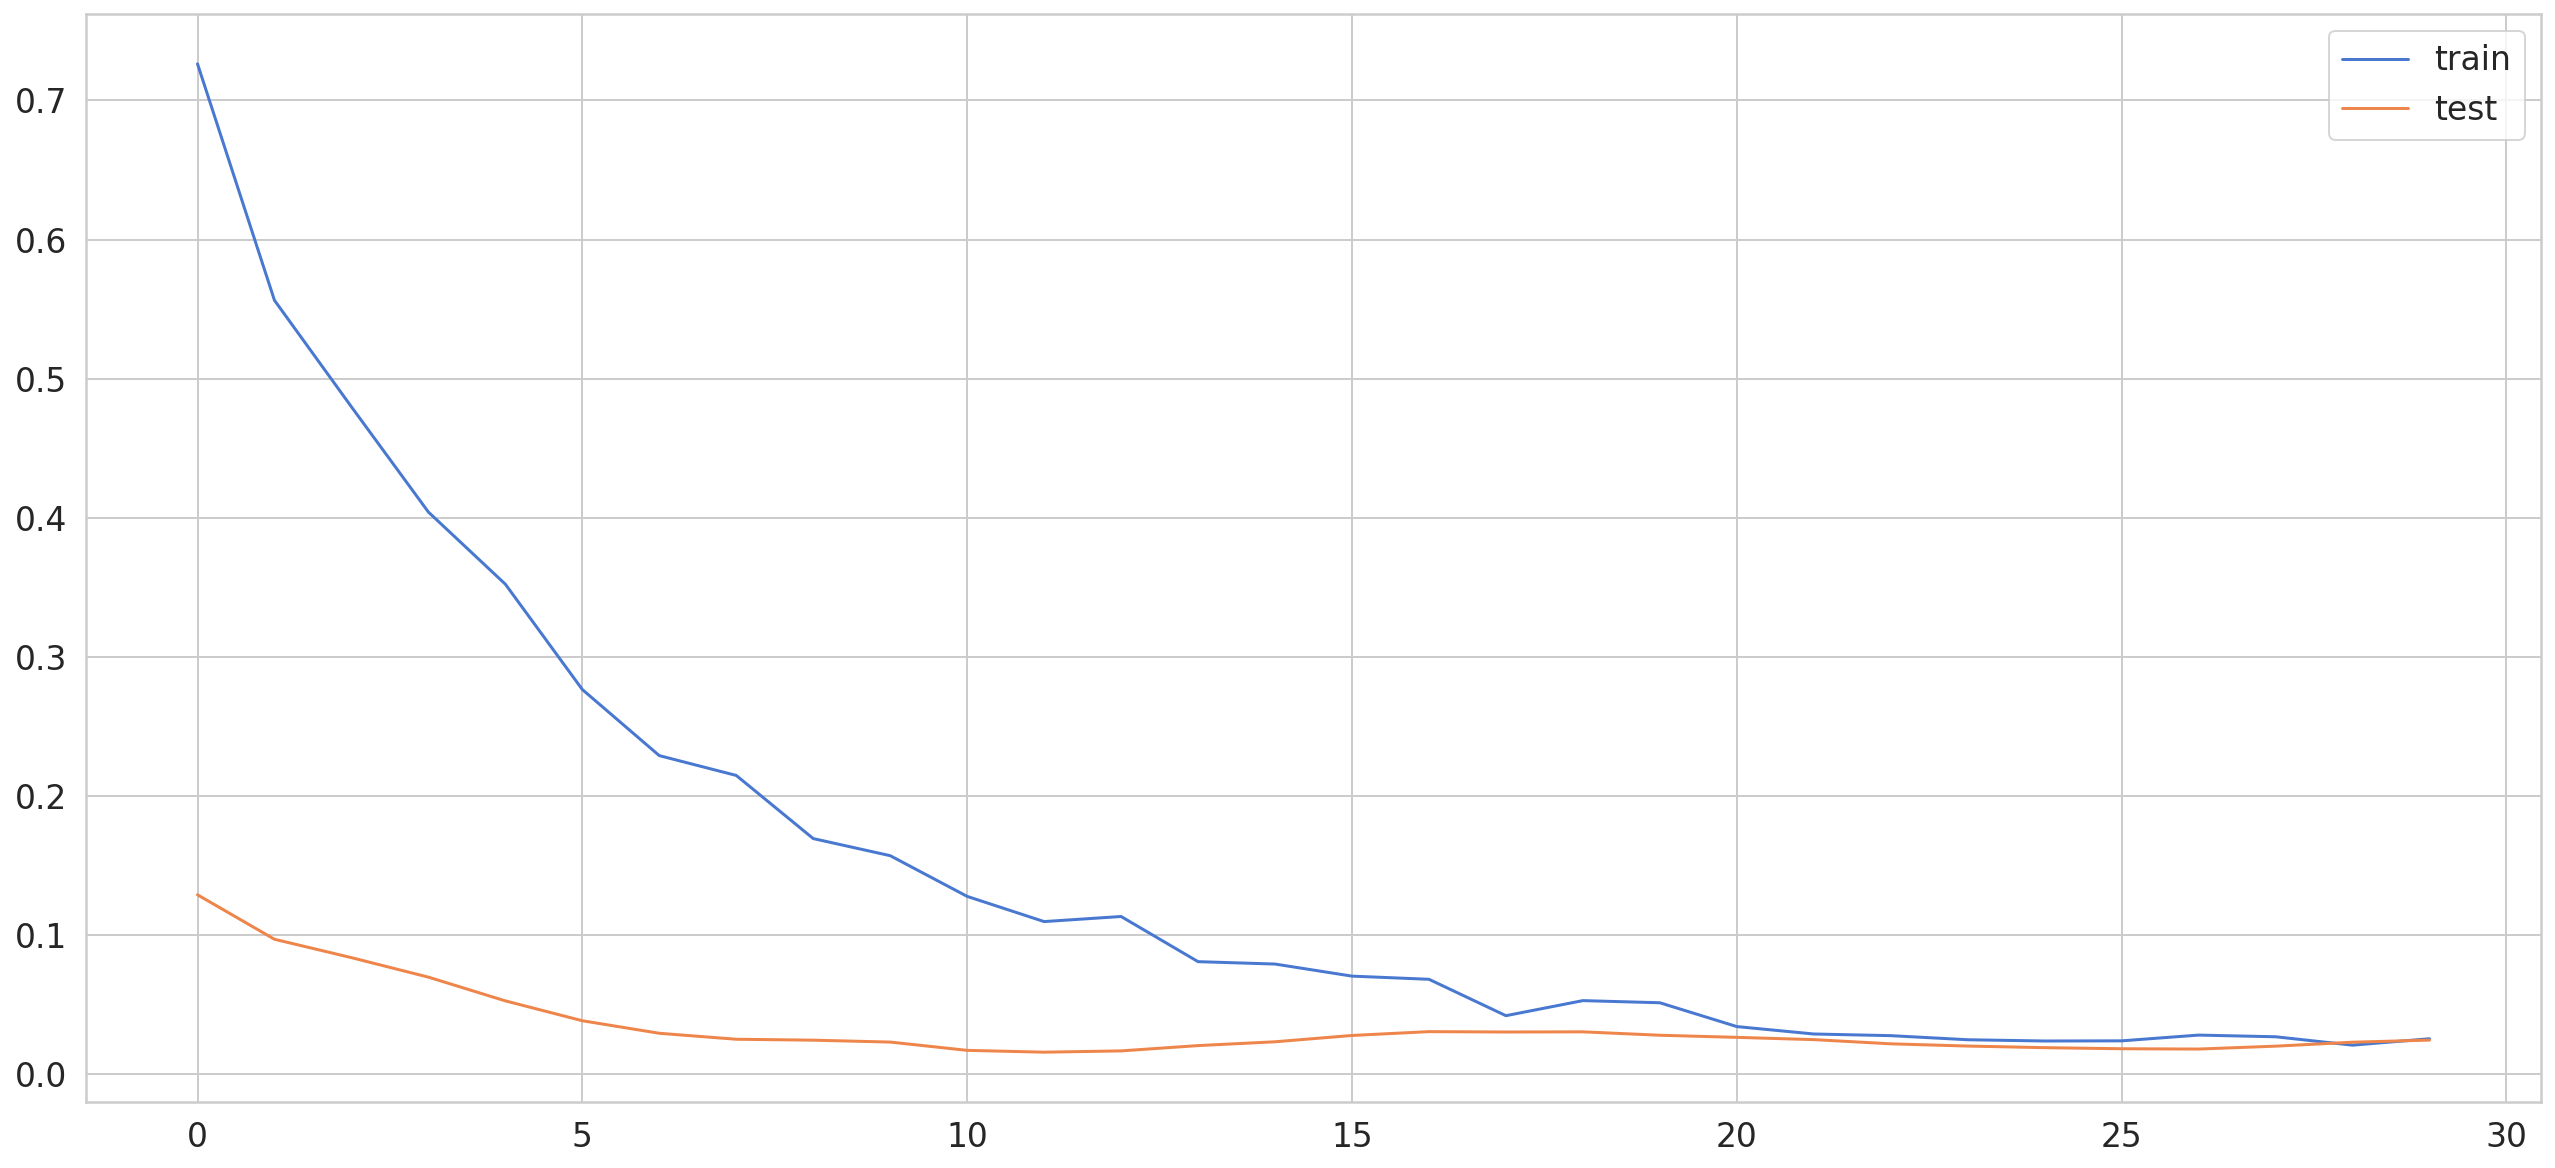

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = t_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = t_transformer.inverse_transform(y_pred)

In [ ]:
print(y_test_inv.flatten())

[37.95826492 37.93625031 37.92913628 38.037025   38.15834395 38.08699265
 38.07007643 38.00237954 38.1037145  38.12670574 38.16078809 38.22107944
 38.27743233 38.2965737  38.37613157 38.33384234 38.3736056  38.37289889]


In [ ]:
nuevos=np.array(df.ALIMENTADORES)
print(df)

NAME             ALIMENTADORES  ...  REFINADOR
FECHA      HORA                 ...           
2020-05-30 0          0.812775  ...  -0.221205
           1          0.827427  ...  -0.097256
           2          0.848308  ...  -0.124005
           3          0.935481  ...  -0.013500
           4          0.999541  ...  -0.000589
...                        ...  ...        ...
2020-06-05 7         -0.249784  ...   0.836984
           8         -0.490218  ...   0.508248
           9         -0.694310  ...   0.346302
           10        -1.403282  ...  -0.043887
           11        -1.590258  ...  -0.395798

[156 rows x 4 columns]


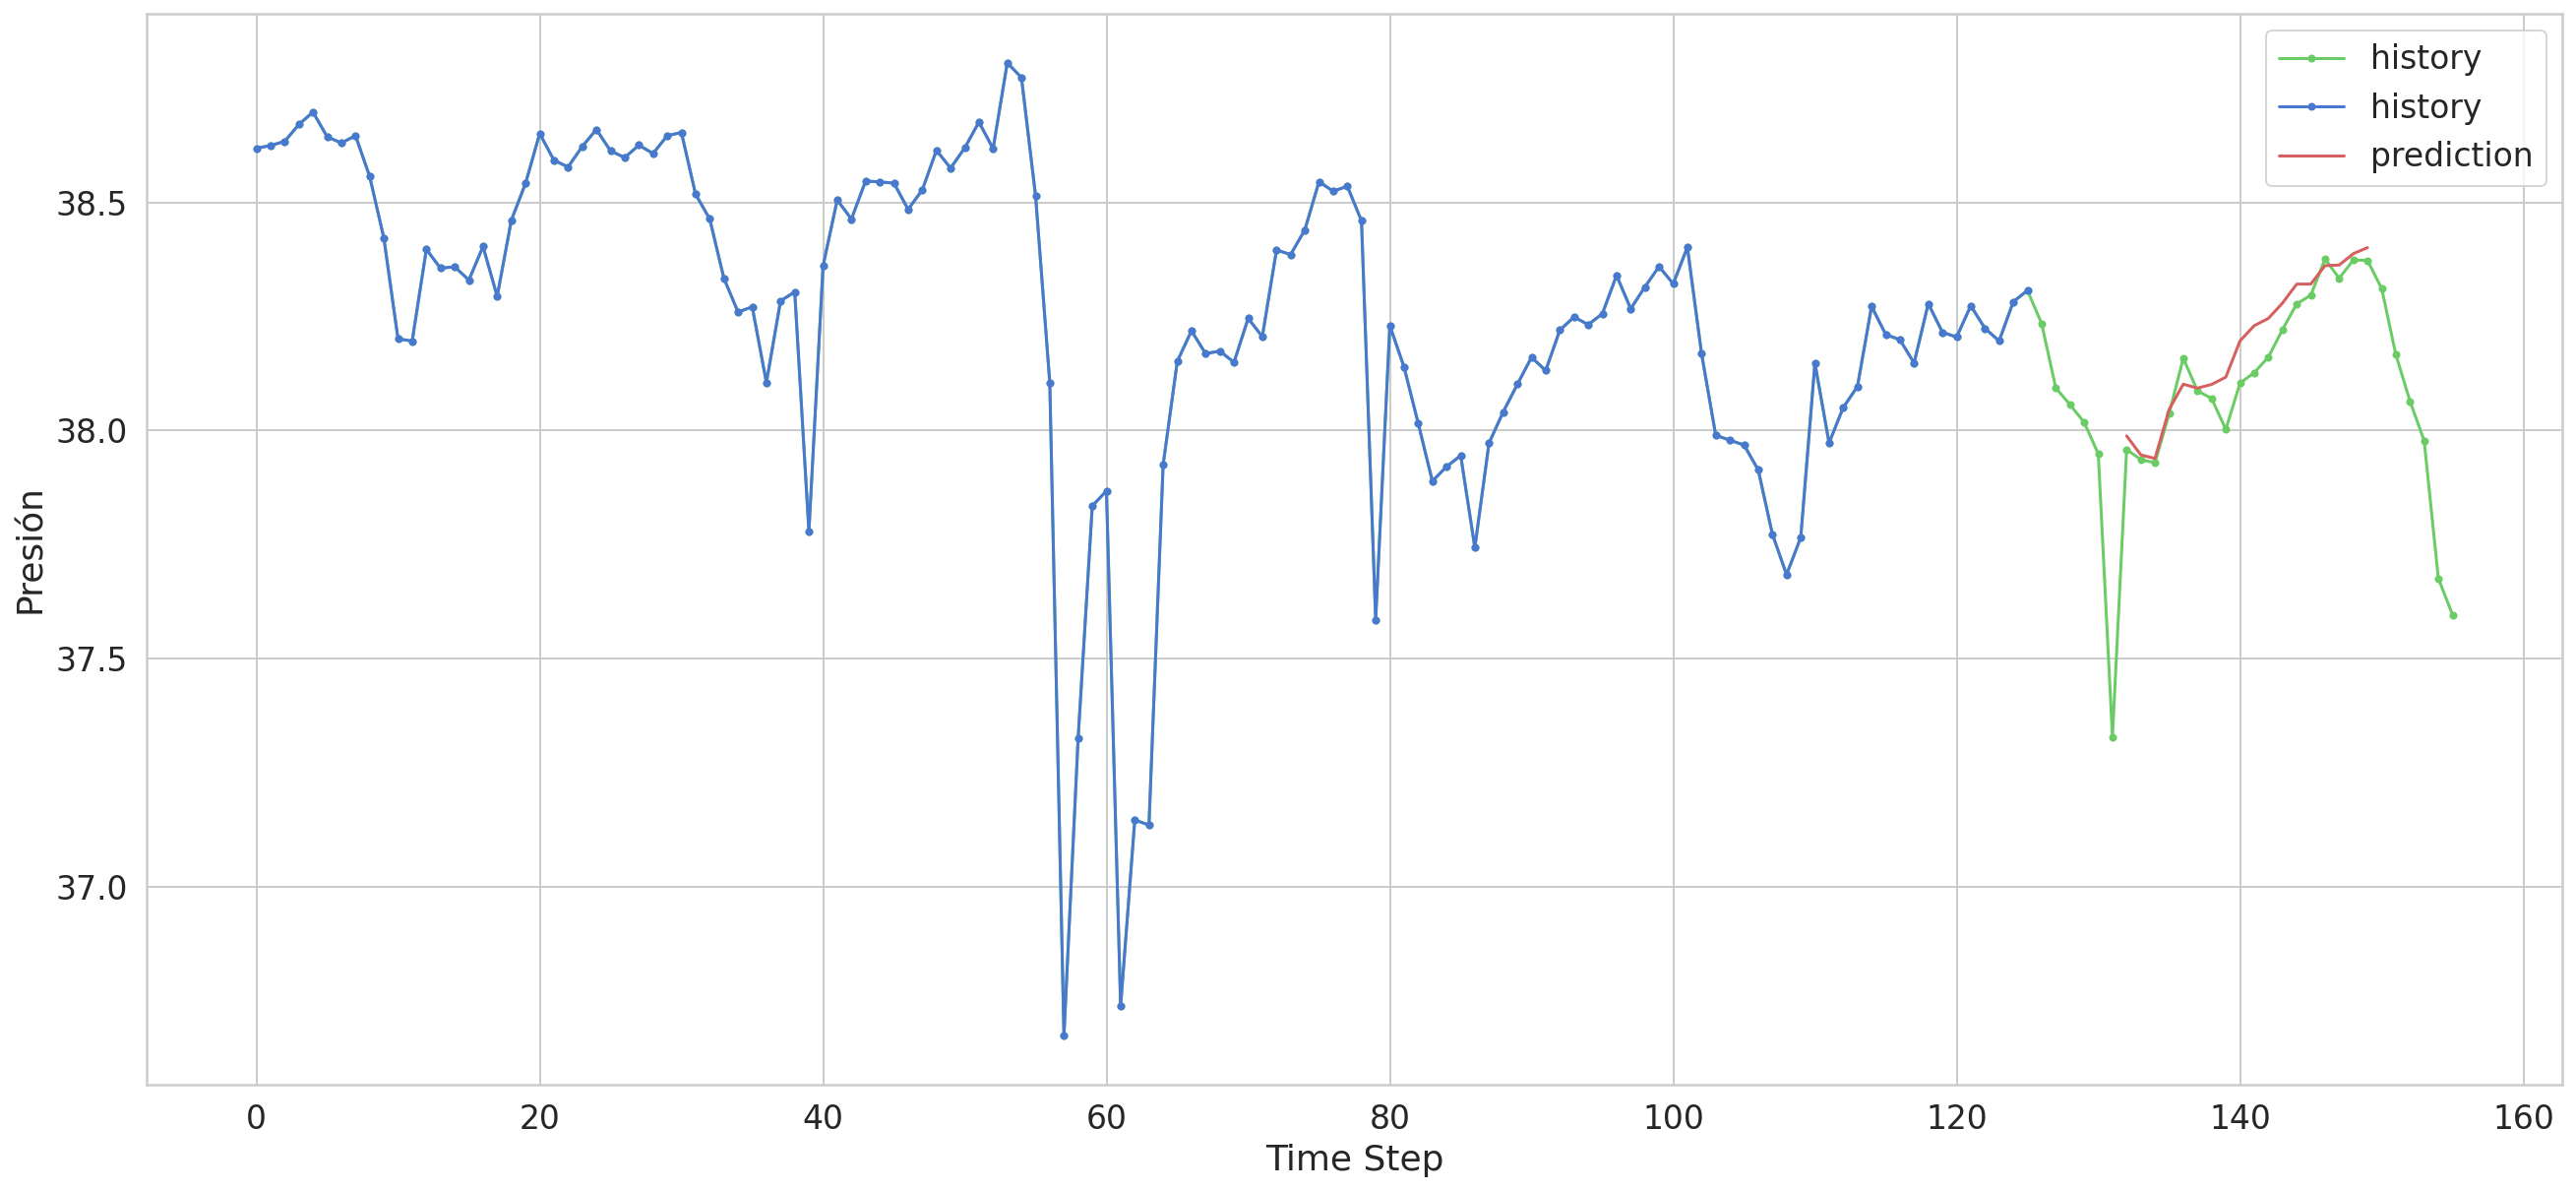

In [ ]:
plt.plot(np.arange(0, largo), faltantes.flatten(), 'g', marker='.',label="history")
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'b', marker='.',label="history")
#plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train)+time_steps, len(y_train) + len(test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Presión')
plt.xlabel('Time Step')
plt.legend()
plt.show();